<a href="https://colab.research.google.com/github/monicasanchezcuberes-rgb/VIU_AlgoritmosOptimizacion_25/blob/main/Algoritmos_AG3_MonicaSanchezCuberes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG3 - Actividad Guiada 3
Nombre: Mònica Sánchez Cuberes <br>
Link:   https://colab.research.google.com/drive/1tplHN_YZVlrjr3dA3GbHV81S50lqp7aw?usp=sharing<br>
Github: https://github.com/monicasanchezcuberes-rgb/VIU_AlgoritmosOptimizacion_25
<br>


#Carga de librerias

In [ ]:
!pip install requests
!pip install tabulate>=0.9 networkx>=3.0
!pip install tsplib95 --no-deps
!pip install deprecated

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsplib95 0.7.1 requires Deprecated~=1.2.9, but you have deprecated 1.3.1 which is incompatible.
tsplib95 0.7.1 requires networkx~=2.1, but you have networkx 3.6.1 which is incompatible.
tsplib95 0.7.1 requires tabulate~=0.8.7, but you have tabulate 0.9.0 which is incompatible.


In [ ]:
!pip install deprecated

#Carga de los datos del problema

In [ ]:

import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random         #Para generar valores aleatorios


#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
#urllib.request.urlretrieve("https://raw.githubusercontent.com/mastqe/tsplib/refs/heads/master/swiss42.tsp", file + '.gz')
urllib.request.urlretrieve("https://raw.githubusercontent.com/mastqe/tsplib/refs/heads/master/swiss42.tsp", file  )
#!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)


#http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/




('swiss42.tsp', <http.client.HTTPMessage at 0x7f98b7f56540>)

In [ ]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())



In [ ]:
Nodos

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41]

In [ ]:
Aristas
# https://github.com/mastqe/tsplib/blob/master/swiss42.tsp

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),



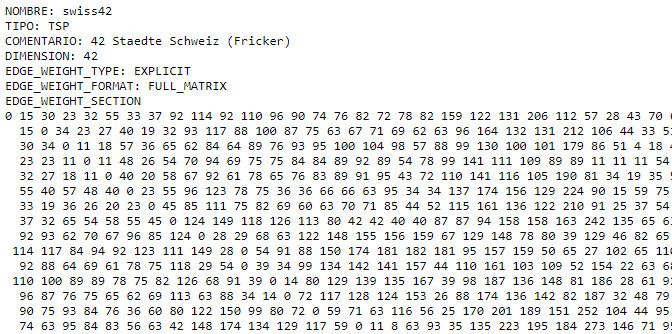

In [ ]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(3, 0)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

23

#Funcionas basicas


In [ ]:

#Funcionas basicas
###############################################################################

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

sol_temporal = crear_solucion(Nodos)


print(sol_temporal   )
print(distancia_total(sol_temporal, problem))

[0, 13, 31, 36, 38, 30, 12, 3, 8, 4, 5, 34, 18, 7, 32, 19, 37, 40, 21, 14, 27, 39, 25, 33, 17, 1, 16, 41, 10, 22, 35, 26, 28, 24, 6, 9, 11, 23, 15, 2, 20, 29]
4819


#BUSQUEDA ALEATORIA

In [ ]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion


#Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 5000)

Mejor solución: [0, 2, 34, 30, 22, 38, 20, 33, 29, 31, 4, 14, 10, 3, 27, 15, 28, 36, 35, 11, 13, 26, 32, 18, 7, 1, 24, 40, 41, 8, 19, 21, 9, 25, 39, 23, 12, 5, 17, 16, 6, 37]
Distancia     : 3679


#BUSQUEDA LOCAL

In [ ]:
###############################################################################
# BUSQUEDA LOCAL(1 paso)
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  #mejor_distancia = 10e100
  mejor_distancia = float('inf')
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3679
Distancia Mejor Solucion Local: 3370


In [ ]:
#Busqueda Local(iteraciones):
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(solucion, problem):
  mejor_solucion = solucion[:]

  #Generar una solucion inicial de referencia(aleatoria)
  #solucion_referencia = crear_solucion(Nodos)
  solucion_referencia = solucion
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    #vecina = genera_vecina(solucion_referencia)
    vecina = genera_vecina(solucion_referencia)
    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina


sol = busqueda_local(nueva_solucion, problem )

En la iteracion  22 , la mejor solución encontrada es: [0, 2, 28, 30, 22, 38, 34, 33, 20, 32, 27, 3, 6, 1, 7, 17, 31, 35, 36, 19, 13, 11, 12, 18, 4, 29, 24, 40, 41, 25, 10, 8, 9, 39, 21, 23, 26, 5, 14, 16, 15, 37]
Distancia     : 1844


Para mejorar el codigo de búsqueda local con 2-opt en la búsqueda de vecindad implementaré el sistema Variable Neighborhood Search (VNS), que combina el 2-opt con el or-opt.

Or-opt extrae un segmento de k-elementos y lo reinserta en la posicion más efectiva. El funcionamiento de VNS es:

1.- mejorar con 2-opt (menos costoso computacionalmente)

2.- Cuando ya no hay mejora posible, mejorar con or-opt (k=1). Si se encuentra mejora, se introduce y sigue trabajando con 2-opt (paso 1)

3.- Si no se encuentra mejora, se intenta or-opt (k=2). Si se encuentra mejora, se introduce y sigue trabajando con 2-opt (paso 1)

4.- Si no se encuentra mejora, se intenta or-opt (k=3). Si se encuentra mejora, se introduce y sigue trabajando con 2-opt (paso 1)

5.- Si no se encuentra se para.

In [ ]:
###############################################################################
# BUSQUEDA LOCALCON VNS
###############################################################################
def genera_vecina_VNS(solucion):
  #Generador de soluciones vecinas: VNS busca oreferentemente con 2-opt
  # y si se encalla recurre a or-opt con k = 1,2,3 sucesivamente, volviendo a 2-opt

  mejor_solucion = solucion[:]
  #mejor_distancia = 10e100
  mejor_distancia = float('inf')
  k = 0 # para controlar que método de vecindad utilizar k= 0 --> 2-opt
  calcula = True # flag para controlar cuando salir del calculo
  while calcula:
    mejora = False
    if k == 0:
      for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
        for j in range(i+1, len(solucion)):

          #Se genera una nueva solución intercambiando los dos nodos i,j:
          vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
          #Se evalua la nueva solución ...
          distancia_vecina = distancia_total(vecina, problem)

          #... para guardarla si mejora las anteriores
          if distancia_vecina < mejor_distancia:
            mejor_distancia = distancia_vecina
            mejor_solucion = vecina
            solucion = mejor_solucion
            mejora = True
      if not mejora: # cuando se encalla pasamos a or-opt con k = 1
                k = 1

    elif k==1:
      for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todas las inserciones or-opt
        for j in range(i, len(solucion)-k):
          segmento = solucion[i:i+k]
          temp = solucion[:i] + solucion[i+k:]  # ruta sin el segmento
          vecina = temp[:j] + segmento + temp[j:]  # insiere en posición j de temp

          #Se evalua la nueva solución ...
          distancia_vecina = distancia_total(vecina, problem)

          #... para guardarla si mejora las anteriores
          if distancia_vecina < mejor_distancia:
            mejor_distancia = distancia_vecina
            mejor_solucion = vecina
            solucion = mejor_solucion
            mejora = True
      if mejora:
        k = 0  # vuelve a 2-opt con nueva solucion
        mejora = False
      else:
        k = 2
        mejora = False

    elif k==2:
      for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todas las inserciones or-opt
        for j in range(i, len(solucion)-k):
          segmento = solucion[i:i+k]
          temp = solucion[:i] + solucion[i+k:]  # ruta sin el segmento
          vecina = temp[:j] + segmento + temp[j:]  # insiere en posición j de temp

          #Se evalua la nueva solución ...
          distancia_vecina = distancia_total(vecina, problem)

          #... para guardarla si mejora las anteriores
          if distancia_vecina < mejor_distancia:
            mejor_distancia = distancia_vecina
            mejor_solucion = vecina
            solucion = mejor_solucion
            mejora = True
      if mejora:
        k = 0  # vuelve a 2-opt con nueva solucion
        mejora = False
      else:
        k = 3
        mejora = False
    elif k==3:
      for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todas las inserciones or-opt
        for j in range(i, len(solucion)-k):
          segmento = solucion[i:i+k]
          temp = solucion[:i] + solucion[i+k:]  # ruta sin el segmento
          vecina = temp[:j] + segmento + temp[j:]  # insiere en posición j de temp

          #Se evalua la nueva solución ...
          distancia_vecina = distancia_total(vecina, problem)

          #... para guardarla si mejora las anteriores
          if distancia_vecina < mejor_distancia:
            mejor_distancia = distancia_vecina
            mejor_solucion = vecina
            solucion = mejor_solucion
            mejora = True
      if mejora:
        k = 0  # vuelve a 2-opt con nueva solucion
        mejora = False
      else:
        calcula = False

  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina_VNS(solucion)
print("Distancia Mejor Solucion Local con vecindad VNS:", distancia_total(nueva_solucion, problem))

Distancia Solucion Incial: 3679
Distancia Mejor Solucion Local con vecindad VNS: 1395


Vemos que la búsqueda con VNS ha mejorada substancialmente la solución obtenida

In [ ]:
#Busqueda Local(iteraciones):
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(solucion, problem):
  mejor_solucion = solucion[:]

  #Generar una solucion inicial de referencia(aleatoria)
  #solucion_referencia = crear_solucion(Nodos)
  solucion_referencia = solucion
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    #vecina = genera_vecina(solucion_referencia)
    vecina = genera_vecina_VNS(solucion_referencia)
    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina


sol = busqueda_local(nueva_solucion, problem )

En la iteracion  1 , la mejor solución encontrada es: [0, 32, 34, 33, 20, 35, 36, 31, 17, 37, 7, 1, 6, 4, 3, 2, 27, 28, 9, 41, 23, 40, 24, 21, 39, 22, 38, 30, 29, 8, 10, 25, 11, 12, 18, 26, 5, 13, 19, 14, 16, 15]
Distancia     : 1395


Vemos que la ieración ya no aprota mejora en haber aplicado la búsqueda de vecindad con VNS

#SIMULATED ANNEALING


In [ ]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [ ]:
def recocido_simulado_aleatorio(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)


    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada con vecindad aleatoria es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado_aleatorio(problem, 10000000)

La mejor solución encontrada con vecindad aleatoria es [0, 31, 35, 36, 17, 16, 15, 14, 5, 26, 7, 20, 32, 28, 2, 12, 11, 25, 10, 8, 34, 33, 38, 22, 23, 41, 40, 24, 21, 39, 9, 29, 30, 3, 27, 1, 4, 6, 18, 13, 19, 37]
con una distancia total de 1967


Vamos a mejorar este método modificando mediante búsqueda de vecindario modificado, en que se alteranrá el método 2-opt y el or-opt de forma aleatoria. Ello es conveniente por la diversidad de operadores combinada con el mecansimo de acpetación propia de el SA.

In [ ]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina aleatoria entre 2-opt y or-opt

def genera_vecina_2or(solucion):
    op = random.choice(['2opt', 'oropt'])
    if op == '2opt':
        i, j = sorted(random.sample(range(1, len(solucion)), 2))
        return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
    else:  # or-opt
        k = random.choice([1, 2, 3])
        if len(solucion) <= k + 2:
          return solucion[:]
        i = random.randint(1, len(solucion)-k-1)
        segmento = solucion[i:i+k]
        temp = solucion[:i] + solucion[i+k:]
        j = random.randint(1, len(temp) - 1)
        return temp[:j] + segmento + temp[j:]

#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99


In [ ]:
def recocido_simulado_2or(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = solucion_referencia[:]
  mejor_distancia = distancia_referencia


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    #vecina =genera_vecina_aleatorio(solucion_referencia)
    vecina =genera_vecina_2or(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)

    delta = distancia_vecina - distancia_referencia
    if delta < 0 or probabilidad(TEMPERATURA, delta):
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada combinando metodos de vecindad es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion


sol  = recocido_simulado_2or(problem, 10000)

La mejor solución encontrada combinando metodos de vecindad es [0, 16, 14, 15, 17, 31, 34, 38, 22, 28, 29, 30, 32, 20, 33, 35, 36, 37, 7, 1, 4, 6, 2, 3, 12, 25, 41, 23, 40, 21, 24, 39, 9, 8, 10, 11, 18, 27, 26, 5, 13, 19]
con una distancia total de 1826


Vemos que la mejora obtenida con este método no es comparable

#Representación en un grafo a partir de la matriz de distancias( Optimización de posiciones usando escalado multidimensional (MDS)



Multidimensional scaling problem(MDS):   https://en.wikipedia.org/wiki/Multidimensional_scaling

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS  # Multidimensional Scaling o Escalado Multidimensional

def plot_tsp_solution(distance_matrix, tsp_solution):
    """
    Dibuja el grafo de un TSP con las posiciones calculadas mediante MDS y muestra
    solo las aristas correspondientes a la solución del TSP.

    :param distance_matrix: np.ndarray, matriz de distancias entre nodos
    :param tsp_solution: list, lista de nodos en el orden de la solución del TSP
    """
    # Crear el grafo completo
    G = nx.Graph()
    num_nodes = len(distance_matrix)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            G.add_edge(i, j, weight=distance_matrix[i][j])

    # Usar MDS para calcular posiciones de los nodos
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)

    # Convertir las posiciones en un diccionario para networkx
    pos = {i: positions[i] for i in range(num_nodes)}

    # Crear un subgrafo con las aristas del camino TSP
    TSP_G = nx.Graph()
    for i in range(len(tsp_solution) - 1):
        u = tsp_solution[i]
        v = tsp_solution[i + 1]
        TSP_G.add_edge(u, v, weight=distance_matrix[u][v])

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Dibujar las aristas del camino TSP
    nx.draw_networkx_edges(TSP_G, pos, edge_color='red', width=2)

    # Añadir etiquetas a los nodos y pesos de las aristas
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(TSP_G, 'weight')
    nx.draw_networkx_edge_labels(TSP_G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Grafo TSP con solución específica")
    plt.show()


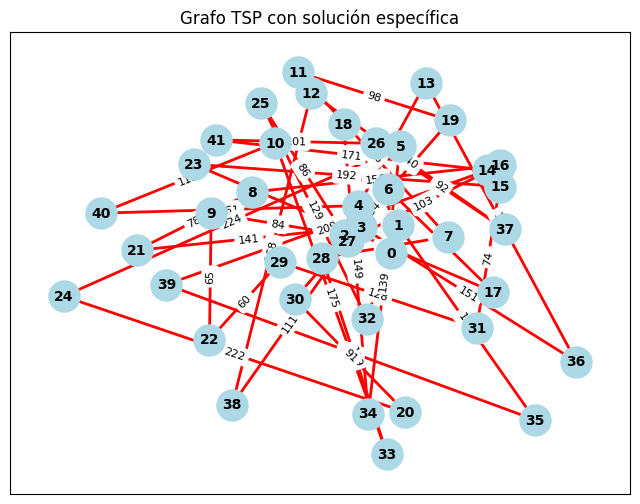

In [ ]:
plot_tsp_solution(problem.edge_weights, crear_solucion(Nodos))

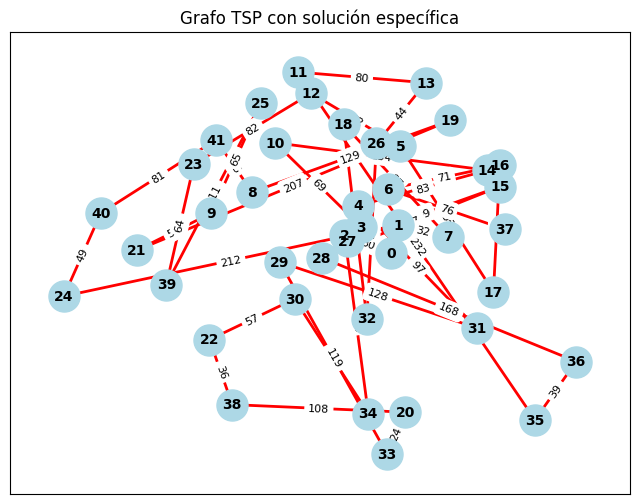

In [ ]:
plot_tsp_solution(problem.edge_weights, solucion)